<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/Med_Stat_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине

## ДЗ 7 Гладышев В.В.

## Анализ выживаемости

### Загрузка и подключение библиотек

In [101]:
library(lubridate)
library(tidyverse)
library(survival)
library(ggplot2)

In [102]:
install.packages('ggsurvfit')
library(ggsurvfit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
install.packages('gtsummary')
library(gtsummary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
install.packages('tidycmprsk')
library(tidycmprsk)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [105]:
install.packages('ggfortify')
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [106]:
install.packages("nph")
library(nph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘mvtnorm’, ‘muhaz’, ‘multcomp’




In [122]:
install.packages("survminer")
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘KMsurv’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [124]:
devtools::install_github("zabore/condsurv") # author package

colorspace (2.1-0 -> 2.1-1) [CRAN]


Installing 1 packages: colorspace

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp9WW9eO/remotes2573d2d5eb1/zabore-condsurv-e618590/DESCRIPTION’ ... OK
* preparing ‘condsurv’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘condsurv_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Загрузка и подготовка данных

In [20]:
data_colon <- read.csv('/content/colon_dataset.tsv', header = TRUE, sep = '\t')
head(data_colon)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
2,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
3,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
4,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
5,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
6,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1


In [21]:
dim(data_colon)

[1] 1858   16

In [22]:
str(data_colon)

'data.frame':	1858 obs. of  16 variables:
 $ id      : int  1 1 2 2 3 3 4 4 5 5 ...
 $ study   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ rx      : chr  "Lev+5FU" "Lev+5FU" "Lev+5FU" "Lev+5FU" ...
 $ sex     : int  1 1 1 1 0 0 0 0 1 1 ...
 $ age     : int  43 43 63 63 71 71 66 66 69 69 ...
 $ obstruct: int  0 0 0 0 0 0 1 1 0 0 ...
 $ perfor  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ adhere  : int  0 0 0 0 1 1 0 0 0 0 ...
 $ nodes   : int  5 5 1 1 7 7 6 6 22 22 ...
 $ status  : int  1 1 0 0 1 1 1 1 1 1 ...
 $ differ  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ extent  : int  3 3 3 3 2 2 3 3 3 3 ...
 $ surg    : int  0 0 0 0 0 0 1 1 1 1 ...
 $ node4   : int  1 1 0 0 1 1 1 1 1 1 ...
 $ time    : int  1521 968 3087 3087 963 542 293 245 659 523 ...
 $ etype   : int  2 1 2 1 2 1 2 1 2 1 ...


In [23]:
unique(data_colon$rx)

[1] "Lev+5FU" "Obs"     "Lev"

In [89]:
unique(data_colon$study); unique(data_colon$sex); unique(data_colon$obstruct);
unique(data_colon$perfor); unique(data_colon$adhere); unique(data_colon$nodes);
unique(data_colon$status); unique(data_colon$differ); unique(data_colon$extent);
unique(data_colon$surg); unique(data_colon$node4); unique(data_colon$etype)

[1] 1

[1] 1 0

[1] 0 1

[1] 0 1

[1] 0 1

[1]  5  1  7  6 22  9  2  3  4 13 19 15 10  8 11 NA 20  0 33 12 14 27 24 17 16

[1] 1 0

[1]  2  3  1 NA

[1] 3 2 1 4

[1] 0 1

[1] 1 0

[1] 2 1

In [24]:
data_colon <-
  data_colon %>%
  as_tibble() %>%
  mutate(rx = recode(rx, `Obs` = 0, `Lev` = 1, `Lev+5FU` = 2))

In [25]:
str(data_colon)

tibble [1,858 × 16] (S3: tbl_df/tbl/data.frame)
 $ id      : int [1:1858] 1 1 2 2 3 3 4 4 5 5 ...
 $ study   : int [1:1858] 1 1 1 1 1 1 1 1 1 1 ...
 $ rx      : num [1:1858] 2 2 2 2 0 0 2 2 0 0 ...
 $ sex     : int [1:1858] 1 1 1 1 0 0 0 0 1 1 ...
 $ age     : int [1:1858] 43 43 63 63 71 71 66 66 69 69 ...
 $ obstruct: int [1:1858] 0 0 0 0 0 0 1 1 0 0 ...
 $ perfor  : int [1:1858] 0 0 0 0 0 0 0 0 0 0 ...
 $ adhere  : int [1:1858] 0 0 0 0 1 1 0 0 0 0 ...
 $ nodes   : int [1:1858] 5 5 1 1 7 7 6 6 22 22 ...
 $ status  : int [1:1858] 1 1 0 0 1 1 1 1 1 1 ...
 $ differ  : int [1:1858] 2 2 2 2 2 2 2 2 2 2 ...
 $ extent  : int [1:1858] 3 3 3 3 2 2 3 3 3 3 ...
 $ surg    : int [1:1858] 0 0 0 0 0 0 1 1 1 1 ...
 $ node4   : int [1:1858] 1 1 0 0 1 1 1 1 1 1 ...
 $ time    : int [1:1858] 1521 968 3087 3087 963 542 293 245 659 523 ...
 $ etype   : int [1:1858] 2 1 2 1 2 1 2 1 2 1 ...


In [26]:
unique(data_colon$status)

[1] 1 0

### Кривые Каплана-Мeйера

In [28]:
km <- with(data_colon, Surv(time, status))
head(km,132)

  [1] 1521   968  3087+ 3087+  963   542   293   245   659   523  1767   904 
 [13]  420   229  3192+ 3192+ 3173+ 3173+ 3308+ 3308+ 2908+ 2908+ 3309+ 3309+
 [25] 2085  1130  2910  2231  2754+ 2754+ 3214+ 1323   406   258   522   389 
 [37]  887   604  3329+ 3329+ 2789  2789+  739   527   709   348  2969+ 2969+
 [49] 2889+ 2889+ 1772  1759   384   121   968   290   218   157   133    62 
 [61] 3238+ 3238+ 3019+ 3019+ 1745   461  2527  1749  1387   593  3024+ 3024+
 [73]  570    43  2815+ 2815+ 2901+ 2901+  553   348   905   510  3030+ 3030+
 [85]  685   489  2740+ 2740+ 2899+ 2899+ 2598+ 2598+ 2840+ 2840+ 2802+ 2802+
 [97] 2781+ 2781+  833   136  1290   632  1620  1233  2765+ 2765+ 2708+ 2708+
[109] 2737+ 2737+ 1178   352  2765+  250  2883+ 2883+ 2679+ 2679+ 2925+ 2925+
[121]  472   176  2772+ 2772+  474   173  2739+ 2739+  365    72  2653+ 2653+

In [35]:
length(data_colon$time); data_colon$time[1:21]; min(data_colon$time); max(data_colon$time)

[1] 1858

[1] 1521  968 3087 3087  963  542  293  245  659  523 1767  904  420  229 3192
[16] 3192 3173 3173 3308 3308 2908

[1] 8

[1] 3329

In [81]:
mlt <- max(data_colon$time)/30
floor(mlt)

[1] 110

In [83]:
length(c(1, 30*(1:mlt)))

[1] 111

In [84]:
km_fit <- survfit(Surv(time, status) ~ 1, data=data_colon)
summary(km_fit, times = c(1, 30*(1:mlt)))

Call: survfit(formula = Surv(time, status) ~ 1, data = data_colon)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   1858       0    1.000 0.00000        1.000        1.000
   30   1849       7    0.996 0.00142        0.993        0.999
   60   1835      12    0.990 0.00234        0.985        0.994
   90   1816      19    0.980 0.00329        0.973        0.986
  120   1788      28    0.964 0.00430        0.956        0.973
  150   1764      25    0.951 0.00502        0.941        0.961
  180   1733      30    0.935 0.00574        0.924        0.946
  210   1704      29    0.919 0.00633        0.907        0.932
  240   1671      32    0.902 0.00691        0.888        0.915
  270   1641      30    0.886 0.00739        0.871        0.900
  300   1611      31    0.869 0.00784        0.854        0.884
  330   1587      24    0.856 0.00816        0.840        0.872
  360   1557      28    0.841 0.00850        0.824        0.858
  390   1528      28    0.826 0.0088

In [85]:
km_fit

Call: survfit(formula = Surv(time, status) ~ 1, data = data_colon)

        n events median 0.95LCL 0.95UCL
[1,] 1858    920   2351    2018    2910

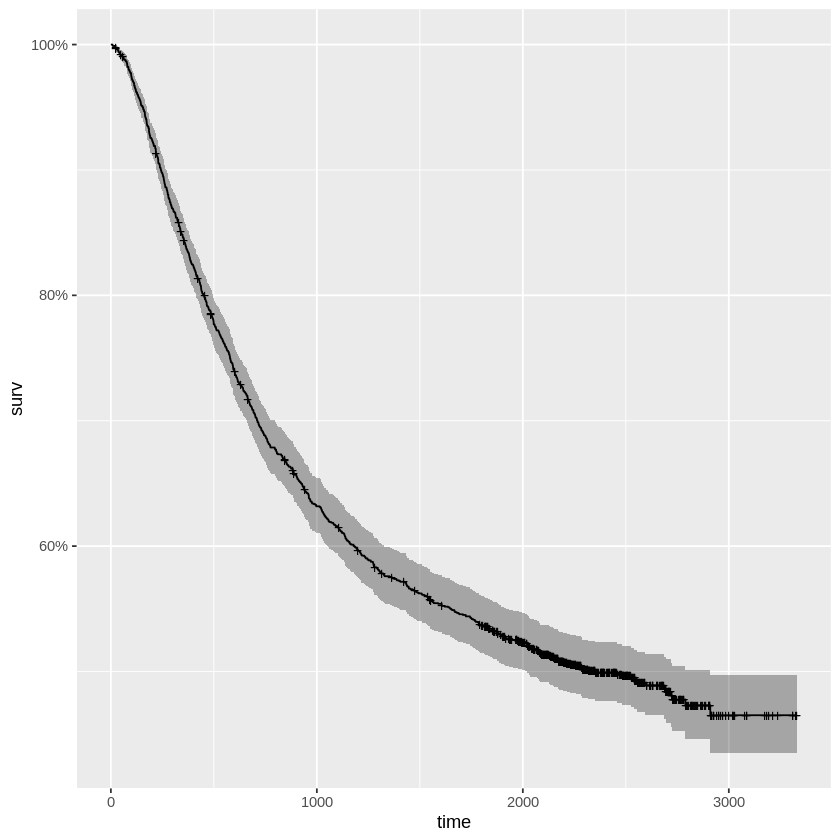

In [86]:
autoplot(km_fit)

### Влияение факторов на выживаемость

#### Пол

In [91]:
km_fit_sex <- survfit(Surv(time, status) ~ sex, data=data_colon)
km_fit_sex

Call: survfit(formula = Surv(time, status) ~ sex, data = data_colon)

        n events median 0.95LCL 0.95UCL
sex=0 890    444   2174    1752      NA
sex=1 968    476   2527    1976    2910

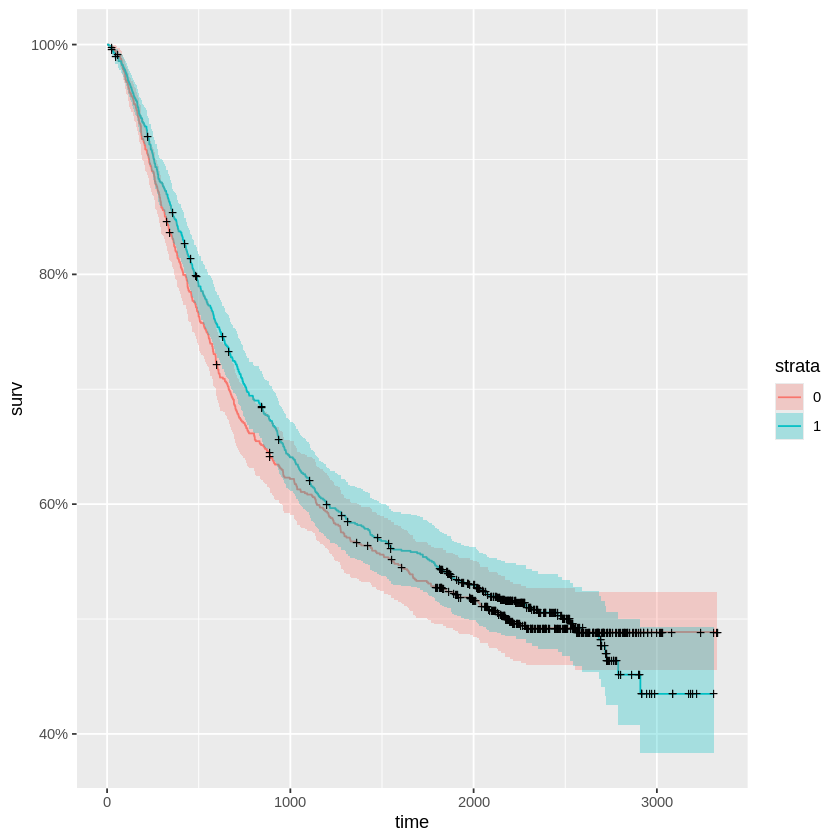

In [92]:
autoplot(km_fit_sex)

#### Тип лечения

In [93]:
km_fit_rx <- survfit(Surv(time, status) ~ rx, data=data_colon)
km_fit_rx

Call: survfit(formula = Surv(time, status) ~ rx, data = data_colon)

       n events median 0.95LCL 0.95UCL
rx=0 630    345   1723    1323    2213
rx=1 620    333   1709    1219    2593
rx=2 608    242     NA      NA      NA

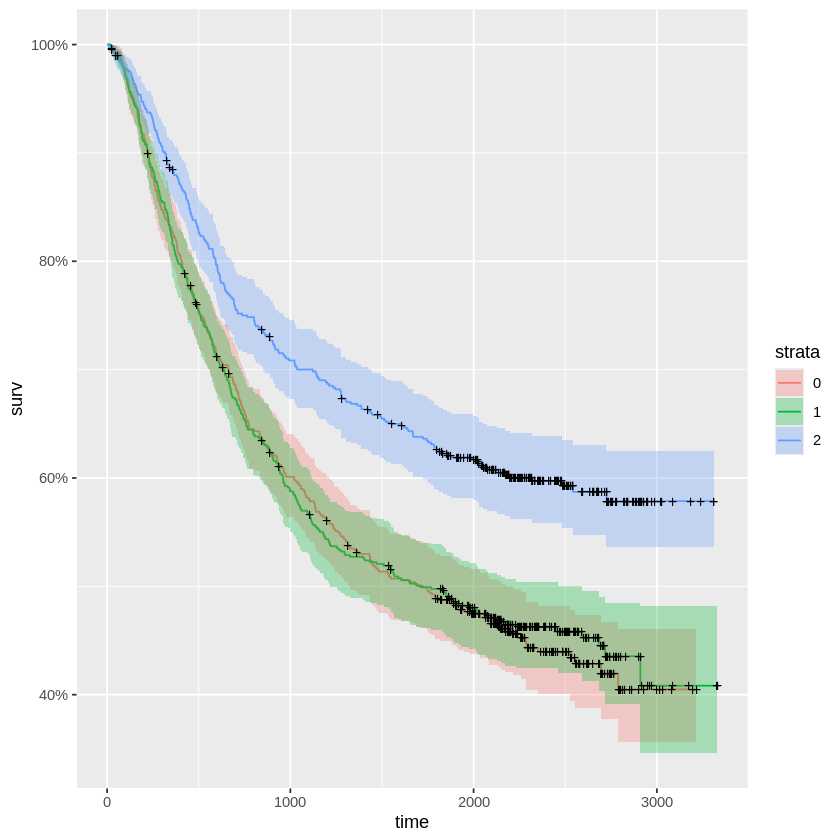

In [94]:
autoplot(km_fit_rx)

#### Степень поражения

In [95]:
km_fit_node4 <- survfit(Surv(time, status) ~ node4, data=data_colon)
km_fit_node4

Call: survfit(formula = Surv(time, status) ~ node4, data = data_colon)

           n events median 0.95LCL 0.95UCL
node4=0 1348    559     NA      NA      NA
node4=1  510    361    697     608     887

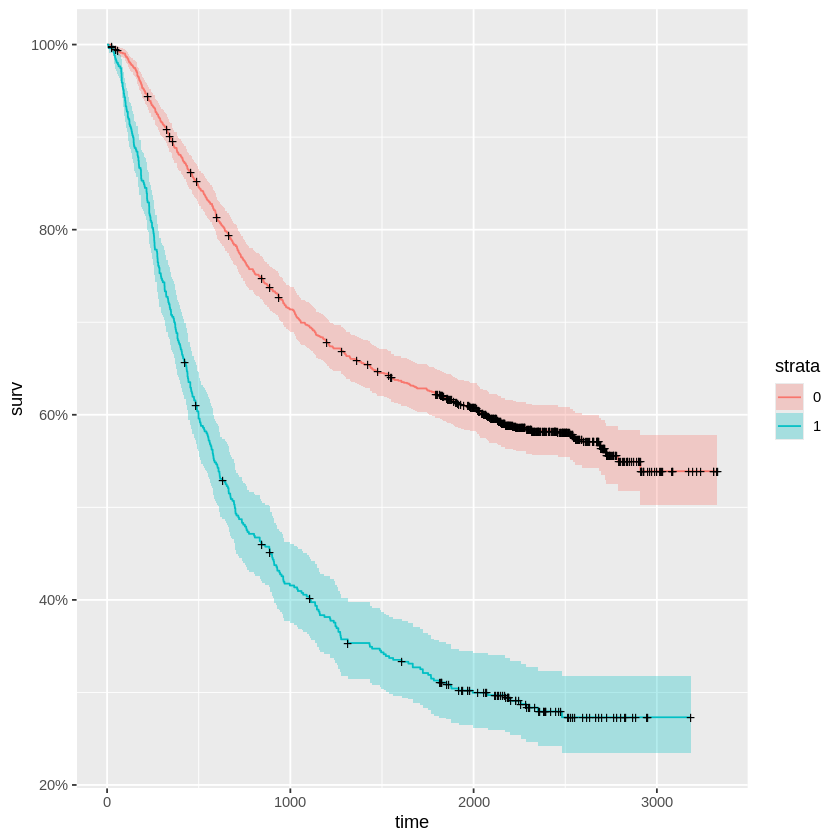

In [96]:
autoplot(km_fit_node4)

#### Интервал до хирургического вмешательства

In [97]:
km_fit_surg <- survfit(Surv(time, status) ~ surg, data=data_colon)
km_fit_surg

Call: survfit(formula = Surv(time, status) ~ surg, data = data_colon)

          n events median 0.95LCL 0.95UCL
surg=0 1364    643   2910    2287      NA
surg=1  494    277   1589    1262    2133

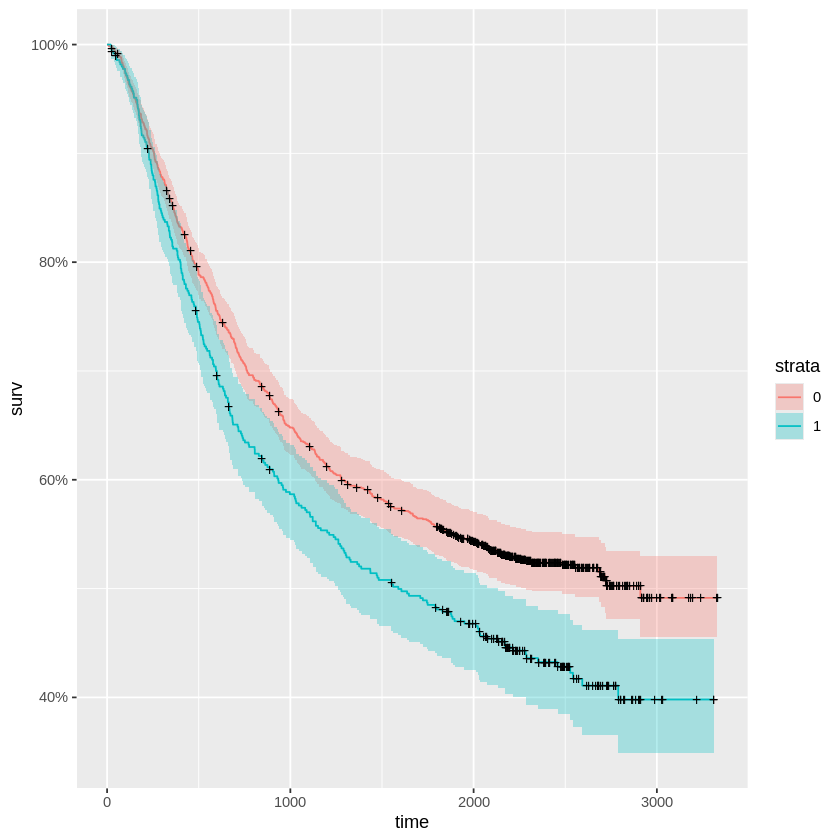

In [98]:
autoplot(km_fit_surg)

### Сравнение групп - лог-ранк тесты

#### По степени поражения

In [113]:
survdiff(Surv(time, status) ~ node4, data = data_colon)

Call:
survdiff(formula = Surv(time, status) ~ node4, data = data_colon)

           N Observed Expected (O-E)^2/E (O-E)^2/V
node4=0 1348      559      728      39.3       190
node4=1  510      361      192     149.2       190

 Chisq= 190  on 1 degrees of freedom, p= <2e-16 

In [107]:
logrank.test(data_colon$time, data_colon$status, data_colon$node4)

Call:
logrank.test(time = data_colon$time, event = data_colon$status, 
    group = data_colon$node4)

     N Observed Expected (O-E)^2/E (O-E)^2/V
1 1348      559      728      39.3       190
2  510      361      192     149.2       190

 Chisq= 190  on 1 degrees of freedom, p= <2e-16
 rho   =  0 gamma =  0 

Отвергаем нулевую гипотезу об отсутствии различий - **различия выявлены**

#### Пол

In [108]:
survdiff(Surv(time, status) ~ sex, data = data_colon)

Call:
survdiff(formula = Surv(time, status) ~ sex, data = data_colon)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 890      444      436     0.136     0.259
sex=1 968      476      484     0.123     0.259

 Chisq= 0.3  on 1 degrees of freedom, p= 0.6 

In [109]:
logrank.test(data_colon$time, data_colon$status, data_colon$sex)

Call:
logrank.test(time = data_colon$time, event = data_colon$status, 
    group = data_colon$sex)

    N Observed Expected (O-E)^2/E (O-E)^2/V
1 890      444      436     0.136     0.259
2 968      476      484     0.123     0.259

 Chisq= 0.3  on 1 degrees of freedom, p= 0.6
 rho   =  0 gamma =  0 

Не отвергаем нулевую гипотезу об отсутствии различий - **различия не выявлены**

### Анализ факторов, влияющих на риск (модель Кокса)

In [ ]:
data_colon$differ

In [119]:
cox <- coxph(Surv(time, status) ~ rx + sex + age + obstruct + perfor + nodes + node4 +
  differ + surg + etype, data = data_colon)
summary(cox)

Call:
coxph(formula = Surv(time, status) ~ rx + sex + age + obstruct + 
    perfor + nodes + node4 + differ + surg + etype, data = data_colon)

  n= 1776, number of events= 876 
   (82 observations deleted due to missingness)

              coef exp(coef)  se(coef)      z Pr(>|z|)    
rx       -0.205464  0.814269  0.041521 -4.948 7.48e-07 ***
sex      -0.070372  0.932047  0.068150 -1.033 0.301792    
age       0.002611  1.002614  0.002878  0.907 0.364438    
obstruct  0.251996  1.286590  0.084170  2.994 0.002755 ** 
perfor    0.275017  1.316552  0.182168  1.510 0.131123    
nodes     0.046079  1.047158  0.010399  4.431 9.37e-06 ***
node4     0.626707  1.871438  0.098940  6.334 2.39e-10 ***
differ    0.172485  1.188254  0.069163  2.494 0.012636 *  
surg      0.233614  1.263157  0.074354  3.142 0.001679 ** 
etype    -0.263414  0.768423  0.067782 -3.886 0.000102 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
rx    

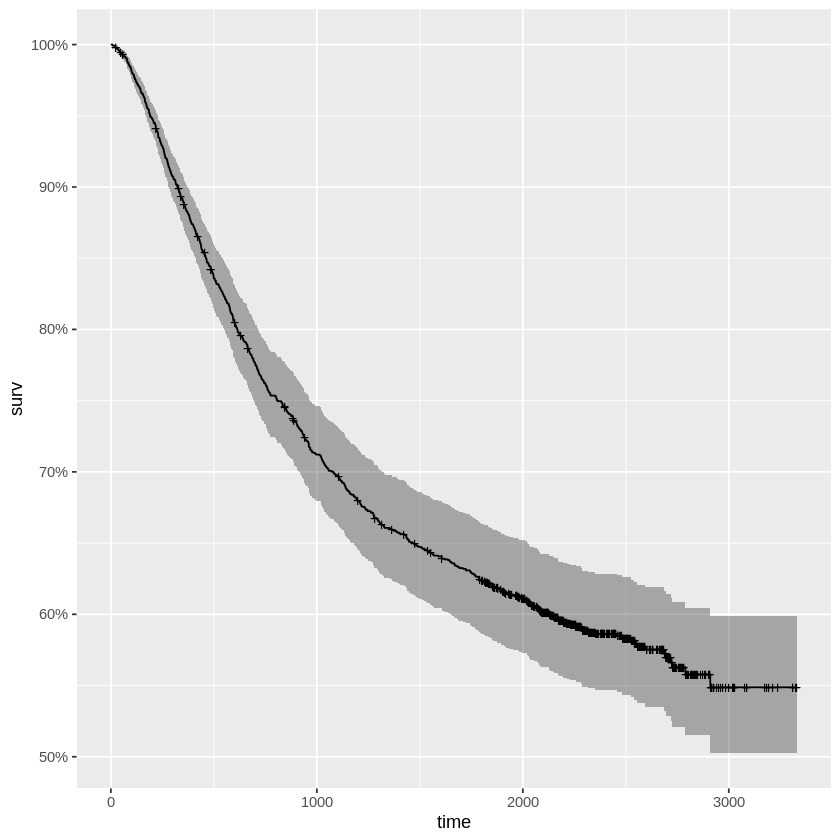

In [120]:
cox_fit <- survfit(cox)

autoplot(cox_fit)

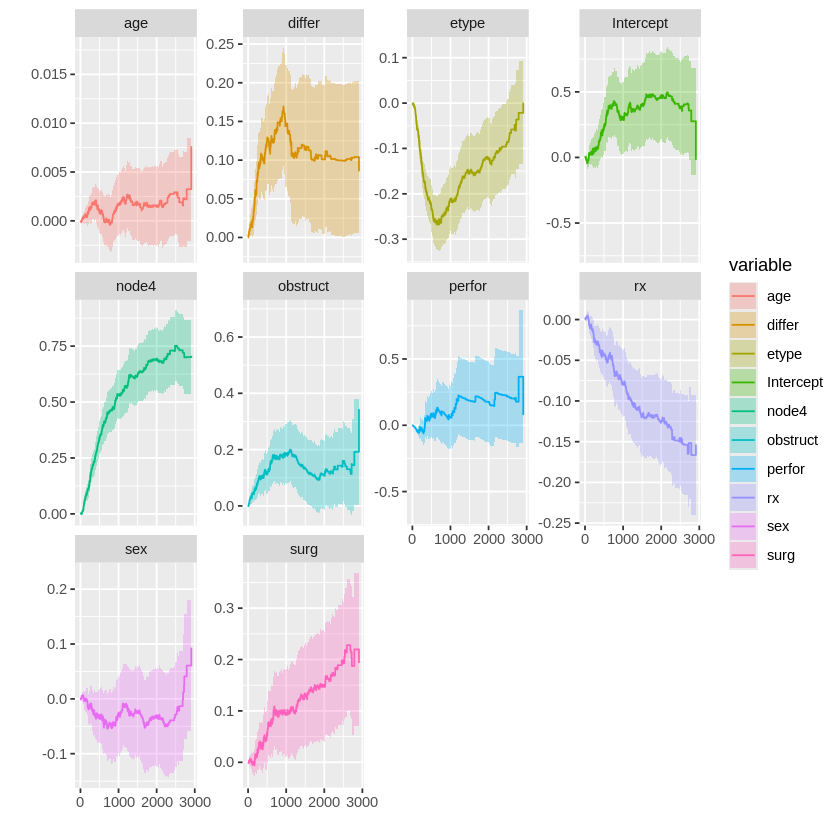

In [127]:
aa_fit <- aareg(Surv(time, status) ~ rx + sex + age + obstruct + perfor + node4 +
  differ + surg + etype, data = data_colon)
autoplot(aa_fit)

In [128]:
aa_fit

Call:
aareg(formula = Surv(time, status) ~ rx + sex + age + obstruct + 
    perfor + node4 + differ + surg + etype, data = data_colon)

  n=1812 (46 observations deleted due to missingness)
    692 out of 692 unique event times used

              slope      coef se(coef)      z        p
Intercept  4.57e-04  4.77e-04 1.93e-04  2.480 1.32e-02
rx        -1.06e-04 -1.47e-04 2.99e-05 -4.930 8.13e-07
sex       -4.74e-05 -3.31e-05 5.04e-05 -0.656 5.12e-01
age        2.12e-06  2.60e-06 2.23e-06  1.160 2.45e-01
obstruct   2.26e-04  2.06e-04 7.25e-05  2.850 4.43e-03
perfor     1.63e-04  2.11e-04 1.73e-04  1.220 2.24e-01
node4      8.22e-04  8.10e-04 7.54e-05 10.700 6.62e-27
differ     1.88e-04  1.60e-04 5.49e-05  2.910 3.57e-03
surg       1.37e-04  1.89e-04 6.07e-05  3.110 1.88e-03
etype     -3.00e-04 -2.02e-04 5.04e-05 -4.010 5.96e-05

Chisq=169.24 on 9 df, p=<2e-16; test weights=aalen

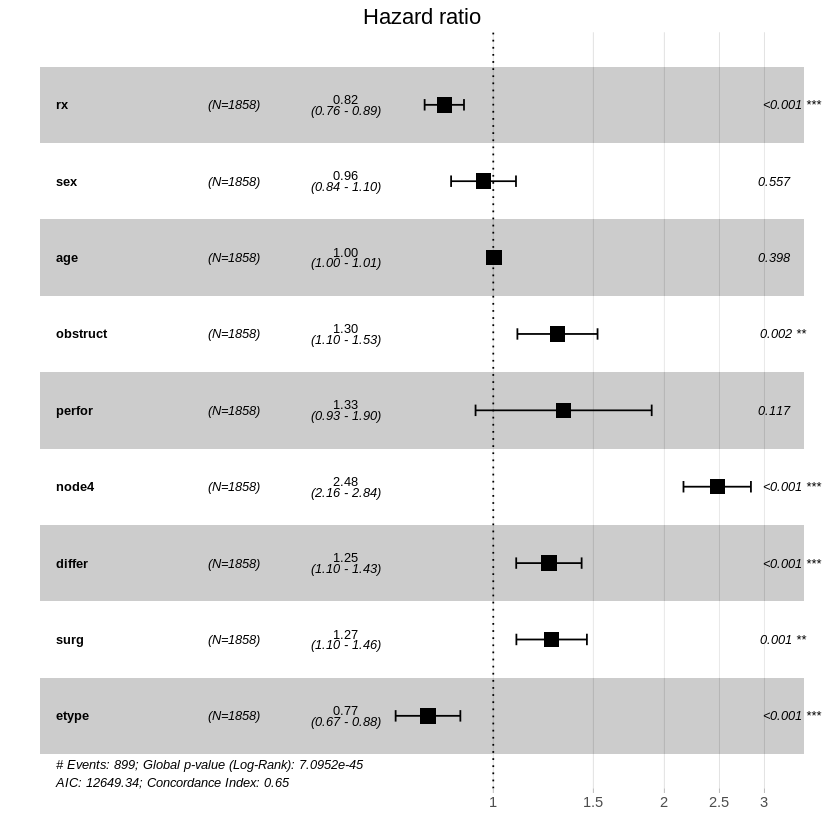

In [130]:
fit.coxph <- coxph(Surv(time, status) ~ rx + sex + age + obstruct + perfor + node4 +
  differ + surg + etype, data = data_colon)
ggforest(fit.coxph, data = data_colon)

Значительное влияние степени поражения